In [ ]:
# !pip install accelerate diffusers controlnet_aux

Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple


In [3]:
import torch
from controlnet_aux import CannyDetector
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
from diffusers.utils import load_image, make_image_grid

/research/abdfahad/anaconda3/envs/sdm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/research/abdfahad/anaconda3/envs/sdm/lib/python3.10/site-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(


In [ ]:
# !pip install transformers>=4.25

In [4]:
import transformers

In [5]:
controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/sd-controlnet-canny", 
    torch_dtype=torch.float16,
    varient="fp16")
 


In [6]:
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "Yntec/AbsoluteReality",
    controlnet=controlnet, 
    torch_dtype=torch.float16)

Loading pipeline components...:  67%|██████▋   | 4/6 [00:00<00:00,  4.92it/s]/research/abdfahad/anaconda3/envs/sdm/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00,  7.26it/s]


In [7]:
pipe.load_ip_adapter("h94/IP-Adapter", 
                     subfolder="models", 
                     weight_name="ip-adapter_sd15.bin")
 
pipe.enable_model_cpu_offload()

In [6]:
pipe

StableDiffusionControlNetPipeline {
  "_class_name": "StableDiffusionControlNetPipeline",
  "_diffusers_version": "0.31.0",
  "_name_or_path": "Yntec/AbsoluteReality",
  "controlnet": [
    "diffusers",
    "ControlNetModel"
  ],
  "feature_extractor": [
    "transformers",
    "CLIPFeatureExtractor"
  ],
  "image_encoder": [
    "transformers",
    "CLIPVisionModelWithProjection"
  ],
  "requires_safety_checker": null,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "HeunDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [8]:
canny = CannyDetector()

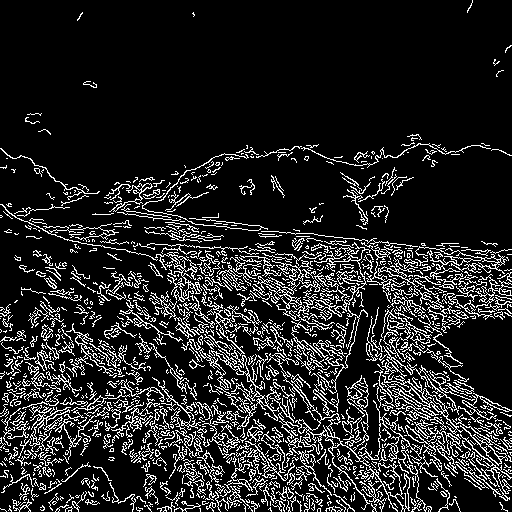

In [10]:
canny_img

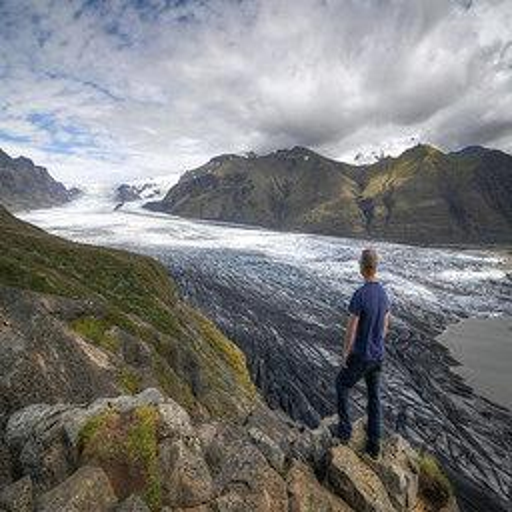

In [9]:
ip_adap_img = load_image("image_4.jpg")
img = load_image("image-real_4.jpg").resize((512, 512))
canny_img = canny(img, detect_resolution=512, image_resolution=512)
img

100%|██████████| 20/20 [00:08<00:00,  2.42it/s]


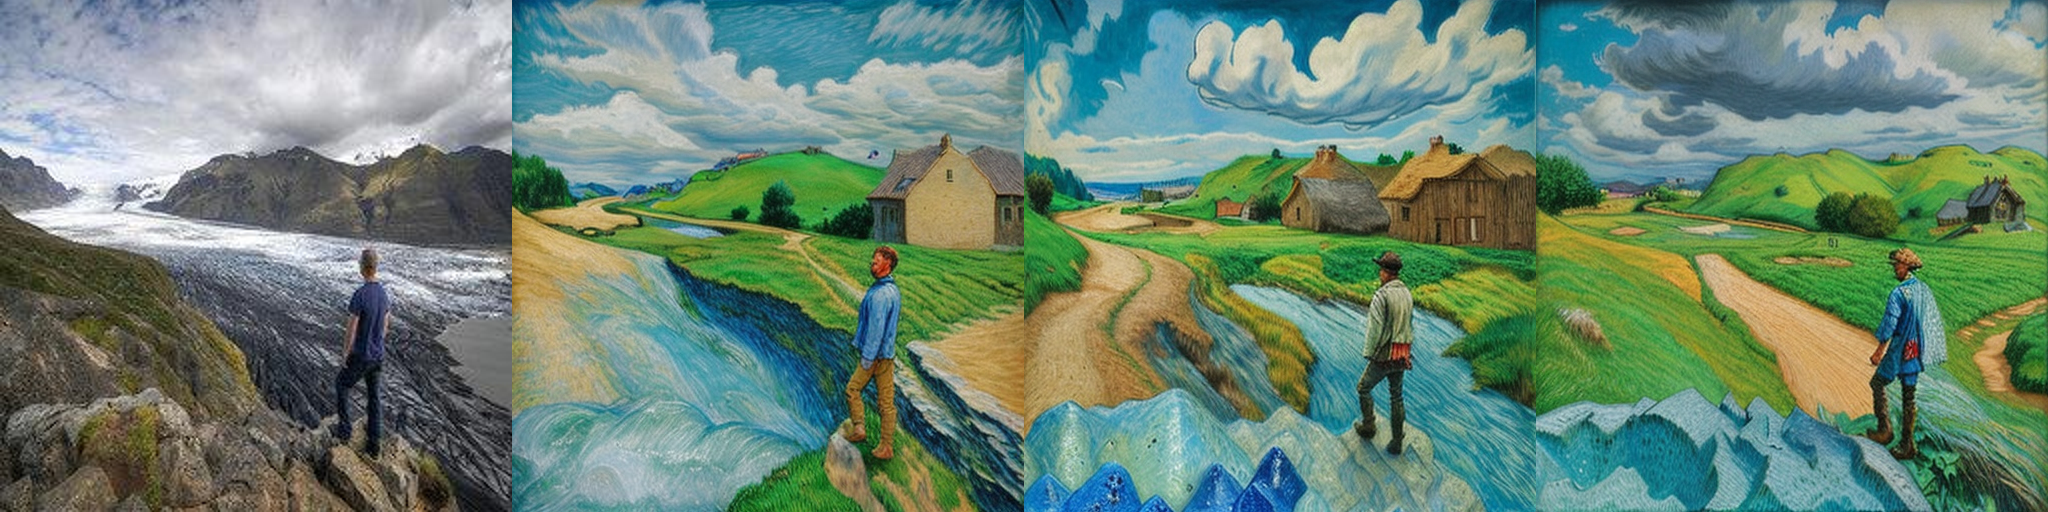

In [ ]:

prompt = """
(photorealistic:1.2), raw, masterpiece, high quality, 
8k, field, sky, house
"""
 
# weightage to style image
pipe.set_ip_adapter_scale(0.7)
 
# generate images
images = pipe(
    prompt=prompt, 
    negative_prompt="low quality",
    height=512,  # Reduce from 768 to 512
    width=512, 
    ip_adapter_image=ip_adap_img,
    image=canny_img,
    guidance_scale=6,
    controlnet_conditioning_scale=0.7,
    num_inference_steps=20,
    num_images_per_prompt=3
).images

images = [img] + images
make_image_grid(images, cols=4, rows=1)

In [ ]:
prompt = """
(photorealistic:1.2), raw, masterpiece, high quality, 
8k, stones, sky, man, sea, mountain
"""

prompt = """
(photorealistic:1.2), raw, masterpiece, high quality, 
8k, field, sky, bird, pond, house
"""